<a href="https://colab.research.google.com/github/yerinsally/BDAA/blob/main/%EC%A0%95%EC%98%88%EB%A6%B0_0115_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 반복문으로 다양한 시각화 그래프 그리기

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
mpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BDAA 5기/data/mpg.csv')

Mounted at /content/drive


In [ ]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


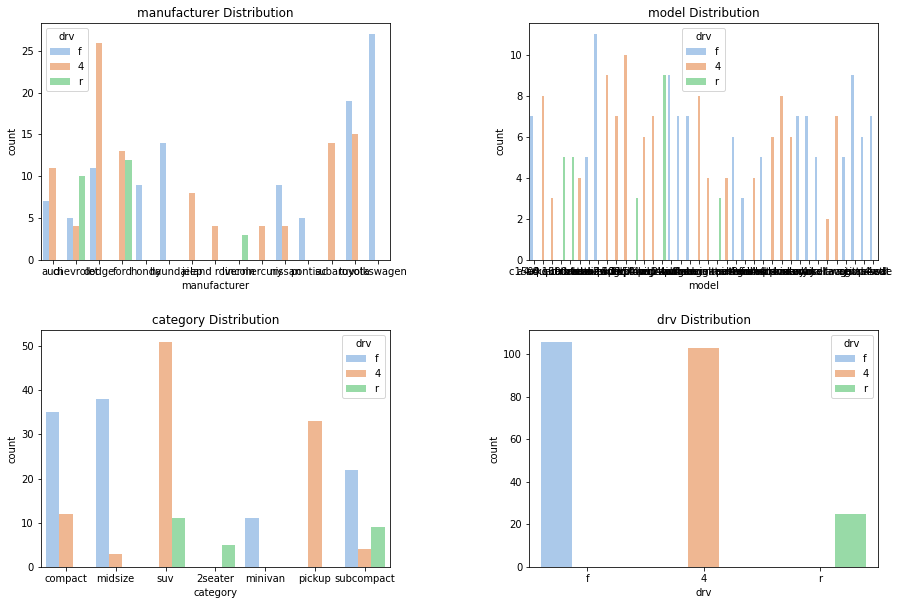

In [ ]:
# 반복문을 통해 시각화하려면 도화지가 여러 개 필요 : gridspec
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(2,2) # 그래프를 그릴 도화지 개수
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 그래프 간의 거리 조절

# 서버플롯 그리기
# sns countplot으로 그래프 그리기 : x에 대한 카운트를 그래프로 그리고 범례도 설정할 수 있음
mpg_features = ['manufacturer','model','category','drv']

for idx, feature in enumerate(mpg_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature,
                 data=mpg,
                 hue='drv',
                 palette='pastel',
                 ax=ax)

    ax.set_title(f'{feature} Distribution')

### 2. 금융 데이터 불러오기

finane-datareader
- 금융 데이터를 다루는데 가장 기본이 되는 데이터는 거래소별 전체 종목 코드와 가격 데이터
- 종목 코드 : 거래소별 전체 종목코드 = KRX (KOSPI, KODAQ, KONEX), NASDAQ, NYSE, AMEX, S&P 500
- 가격 데이터
1. 해외주식 가격 데이터: AAPL(애플), AMZN(아마존), GOOG(구글) 등
2. 국내주식 가격 데이터: 005930(삼성전자), 091990(셀트리온헬스케어) 등
3. 각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)
4. 환율 데이터: USD/KRX (원달러 환율), USD/EUR(달러당 유로화 환율), CNY/KRW: 위엔화 원화 환율
5. 암호화폐 가격: BTC/USD (비트코인 달러 가격, Bitfinex), BTC/KRW (비트코인 원화 가격, 빗썸)

In [ ]:
pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 한국거래소 상장종목 전체 불러오기
df_krx = fdr.StockListing('KRX') 
df_krx.Market.value_counts()

KOSDAQ           1566
KOSPI             943
KONEX             134
KOSDAQ GLOBAL      51
Name: Market, dtype: int64

In [ ]:
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,64600,1,700,1.10,64400,65000,63900,18760182,1212764792491,385647952730000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,506000,2,-11000,-2.13,525000,526000,504000,459245,235054829000,118404000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,91500,2,-800,-0.87,91300,92800,90300,2553811,234318676392,66612216397500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,809000,1,14000,1.76,794000,811000,791000,83364,67041865000,57579766000000,71174000,STK
4,051910,KR7051910008,LG화학,KOSPI,,685000,3,0,0.00,696000,696000,674000,186406,127932320000,48355754955000,70592343,STK


In [ ]:
df_krx.Name.value_counts()

삼성전자         1
영흥           1
유성티엔에스       1
미래에셋맵스리츠     1
솔루스첨단소재1우    1
            ..
이녹스          1
좋은사람들        1
JTC          1
유니셈          1
베른           1
Name: Name, Length: 2694, dtype: int64

In [ ]:
# ex. 2021년 ~ 현재까지의 네이버 주가를 데이터 프레임으로 불러오기
df_naver = fdr.DataReader('060310', '2023') # '해당 기업 symbol', '기준 연도'

# 가장 마지막(최신)의 10일치 주가 출력
df_naver.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-01-12,2250,2265,2230,2250,105930,0.000000
2023-01-13,2230,2280,2230,2250,104800,0.000000
2023-01-16,2250,2275,2235,2250,93681,0.000000
2023-01-17,2240,2260,2170,2195,120672,-0.024444
2023-01-18,2195,2205,2175,2180,103560,-0.006834
2023-01-19,2175,2225,2165,2220,93925,0.018349
2023-01-20,2215,2245,2210,2235,54706,0.006757
2023-01-25,2240,2290,2235,2285,104079,0.022371
2023-01-26,2290,2300,2265,2275,89572,-0.004376
